# Enter Student Name & ID

In [21]:
student_id =  "400101956"
student_name = "Mohammad Morsali" 
print("your student id:", student_id)
print("your name:", student_name)

your student id: 400101956
your name: Mohammad Morsali


## Part 1. Implementing Your Own PCA Function.

### 1.1 Complete the function below using only the `numpy` library.

In [22]:
import numpy as np

In [23]:
def myPCA(X, num_components):
    # Get the number of samples (m) and features (n)
    m, n = X.shape

    # Standardize the dataset
    X_mean = np.mean(X, axis=0)
    X_std = np.std(X, axis=0, ddof=1)
    X_normalized = (X - X_mean) / X_std

    # Compute the covariance matrix
    cov_matrix = np.cov(X_normalized, rowvar=False)

    # Perform eigen decomposition
    eigen_values, eigen_vectors = np.linalg.eigh(cov_matrix)

    # Sort eigenvalues and eigenvectors in descending order
    sorted_indices = np.argsort(eigen_values)[::-1]
    sorted_eigenvalues = eigen_values[sorted_indices]
    sorted_eigenvectors = eigen_vectors[:, sorted_indices]

    # Select the top 'num_components' eigenvectors
    selected_eigenvectors = sorted_eigenvectors[:, :num_components]

    # Transform the data to the new space
    X_pca = X_normalized @ selected_eigenvectors

    # Additional information
    explained_variance = sorted_eigenvalues[:num_components]
    total_variance = np.sum(sorted_eigenvalues)
    explained_variance_ratio = explained_variance / total_variance

    return X_pca, selected_eigenvectors, explained_variance, explained_variance_ratio


### 1.2 Perform your PCA function on the IRIS dataset, reduce it to 2D, and plot the results.

In [24]:
import matplotlib as plt
from sklearn.datasets import load_iris


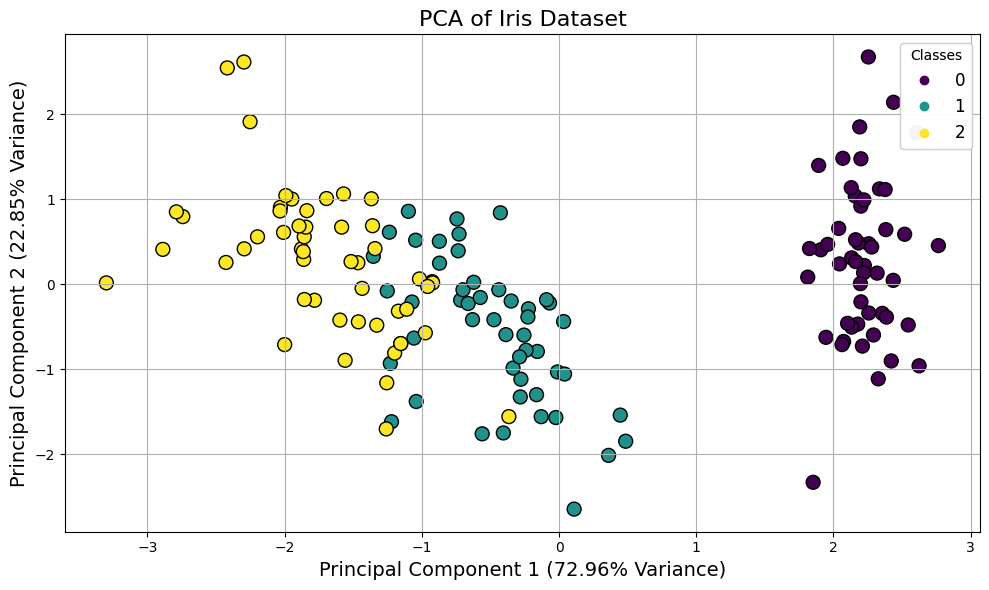

In [25]:
# Load iris dataset
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

# Apply PCA
reduced_X, _, explained_variance, explained_variance_ratio = myPCA(X, 2)

# Improved plot
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
scatter = plt.scatter(reduced_X[:, 0], reduced_X[:, 1], c=y, cmap='viridis', edgecolor='k', s=100)

# Add title and labels
plt.title('PCA of Iris Dataset', fontsize=16)
plt.xlabel(f'Principal Component 1 ({explained_variance_ratio[0]*100:.2f}% Variance)', fontsize=14)
plt.ylabel(f'Principal Component 2 ({explained_variance_ratio[1]*100:.2f}% Variance)', fontsize=14)

# Add legend
legend1 = plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right", fontsize=12)
plt.gca().add_artist(legend1)

# Grid and tight layout
plt.grid(True)
plt.tight_layout()

# Show plot
plt.show()

## Part 2. Faces Dataset

The dataset contains a total of 40 folders, each contains 10 images depicting a specific individual in ten different states.

### 2.1  Describe eigenfaces and how they are related to PCA.


#### **Eigenfaces Overview**

**Eigenfaces** are a set of eigenvectors used in the computer vision problem of human face recognition. They are derived from the covariance matrix of the probability distribution over the high-dimensional vector space of possible human faces. Here's a comprehensive breakdown of what eigenfaces are and how they relate to Principal Component Analysis (PCA):

#### **Concept of Eigenfaces**

1. **Face Representation**: 
    - In the context of eigenfaces, each face image is treated as a vector. For example, a grayscale image of size \($ m \times n $\) pixels can be represented as a vector in \($ \mathbb{R}^{m \times n}$ \). Each pixel's intensity is an element in this vector.
    
2. **Dimensionality Reduction**: 
    - The vector representation of images in such a high-dimensional space can be computationally expensive and redundant. Eigenfaces help reduce this dimensionality while retaining essential features needed for recognizing faces.

3. **Training Set**:
    - A large set of face images (training set) is used to compute eigenfaces. These images are typically aligned and normalized to have the same size and facial features aligned.

#### **Principal Component Analysis (PCA) and Eigenfaces**

PCA is a statistical technique used for dimensionality reduction while preserving as much variability (information) as possible. Here’s how PCA is applied to face recognition to derive eigenfaces:

1. **Data Preparation**:
    - Collect a dataset of face images. Each image is converted to a vector by stacking its pixel values.
    - Suppose we have \($ N$ \) images, each represented as a vector of size \( $ m \times n $\). The dataset can be represented as a matrix \($ X $\) of size \( $N \times (m \times n) $\).

2. **Mean Centering**:
    - Compute the mean face vector (average of all face vectors) and subtract it from each face vector in the dataset to center the data around the origin.

3. **Covariance Matrix**:
    - Construct the covariance matrix of the centered data. In high-dimensional spaces, this matrix might be large, so sometimes, an alternative approach using a smaller matrix is used to compute the eigenvectors.

4. **Eigen Decomposition**:
    - Perform eigen decomposition on the covariance matrix to obtain eigenvalues and eigenvectors.
    - The eigenvectors represent the directions of maximum variance in the data. When sorted by their corresponding eigenvalues in descending order, the top eigenvectors capture the most significant variations.

5. **Eigenfaces**:
    - The top \($ k $ \) eigenvectors (where \($ k $\) is much smaller than the original dimension) are reshaped back into the original image space, forming the eigenfaces.
    - Each eigenface is essentially a feature that captures a principal component of the face dataset, representing variations like changes in facial features, lighting, and expressions.

6. **Projection**:
    - Any new face image can be projected onto this lower-dimensional eigenface space by computing its dot product with the top \( $ k $\) eigenfaces. This projection yields a set of weights (coefficients) representing the face in terms of eigenfaces.

#### **Applications and Advantages of Eigenfaces**

1. **Face Recognition**:
    - In face recognition tasks, eigenfaces are used to project new face images into the eigenface space and then compare them with projections of known faces to find the closest match.

2. **Dimensionality Reduction**:
    - Eigenfaces significantly reduce the dimensionality of face data, making it computationally feasible to handle large datasets.

3. **Feature Extraction**:
    - Eigenfaces effectively capture the essential features of faces, facilitating tasks like recognition, clustering, and classification.

4. **Visualization**:
    - Eigenfaces provide a visual representation of the principal components, allowing us to understand the most significant variations in facial features.

#### **Conclusion**

Eigenfaces are a powerful application of PCA in the domain of face recognition. By transforming high-dimensional face images into a lower-dimensional eigenface space, PCA helps capture the most important features, enabling efficient and effective face recognition. The eigenfaces derived through PCA serve as the foundational components for representing and distinguishing between different human faces.


### 2.2 Read the given dataset and create train and test matrices. 
For each person, use the first five images for training and the second five images for test (`X_train`, `X_test`). Also, create labels for them (`y_train`, `y_test`).

Note: For reading the images, you can use opencv library. You can install this library using the below command in terminal:

`pip install opencv-python`

In [26]:
import os
import cv2
import numpy as np
import glob

dir = 'FacesDataset1/ORL/'

# Using list comprehensions to collect folders and images
folders = [folder for folder in os.listdir(dir) if os.path.isdir(os.path.join(dir, folder))]

X_train, y_train, X_test, y_test = [], [], [], []

# Iterate over folders
for label, folder in enumerate(folders):
    folder_path = os.path.join(dir, folder)
    # Use glob to find all .bmp files in the folder
    images = sorted(glob.glob(os.path.join(folder_path, '*.bmp')))

    # Split the images into training and testing sets
    train_images = images[:5]
    test_images = images[5:]

    # Load and append training images
    for image_path in train_images:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:  # Ensure the image was read correctly
            X_train.append(image)
            y_train.append(label)

    # Load and append testing images
    for image_path in test_images:
        image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
        if image is not None:  # Ensure the image was read correctly
            X_test.append(image)
            y_test.append(label)

# Initialize lists
data_lists = [X_train, y_train, X_test, y_test]
data_names = ['X_train', 'y_train', 'X_test', 'y_test']

# Convert lists to numpy arrays and reshape
for i in range(len(data_lists)):
    if 'X' in data_names[i]:  # If the list is X_train or X_test
        data_lists[i] = np.array(data_lists[i]).reshape(len(data_lists[i]), -1)
    else:  # If the list is y_train or y_test
        data_lists[i] = np.array(data_lists[i])

# Print shapes
for i in range(len(data_lists)):
    print(f'{data_names[i]} shape: {data_lists[i].shape}')

X_train shape: (200, 2304)
y_train shape: (200,)
X_test shape: (200, 2304)
y_test shape: (200,)


### 2.3 Performing PCA.

Perform PCA on the data and reduce the dimensionality to a suitable range (e.g., between 40 and 50).

In [30]:
def standardize_data(X):
    mean = np.mean(X, axis=0)
    std_dev = np.std(X, axis=0)
    return (X - mean) / std_dev

num_components = 45

# Convert X_train to a numpy array and reshape it to two dimensions if necessary
X_train = np.array(X_train)
if X_train.ndim > 2:
    X_train = X_train.reshape((X_train.shape[0], -1))

# Use your own PCA function
X_train_reduced, param, explained_variance, explained_variance_ratio = myPCA(X_train, num_components)

# Use your own standardization function
X_test = standardize_data(X_test)

# Convert X_test to a numpy array and reshape it to two dimensions if necessary
X_test = np.array(X_test)
if X_test.ndim > 2:
    X_test = X_test.reshape((X_test.shape[0], -1))

# Apply the PCA transformation to the test data
X_test_reduced = X_test @ param

### 2.4 Training a Classifier
Train an LDA classifier on the PCA-transformed data and report the accuracy.

In [31]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.metrics import accuracy_score
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import cross_val_score

In [32]:

# Create a pipeline
pipeline = make_pipeline(LDA())

# Fit and predict using the pipeline
pipeline.fit(X_train_reduced, y_train)
y_test_predict = pipeline.predict(X_test_reduced)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_test_predict)
print(f"Accuracy: {accuracy}")

# Perform cross-validation
cv_scores = cross_val_score(pipeline, X_train_reduced, y_train, cv=5)
print(f"Cross-validation scores: {cv_scores}")
print(f"Average cross-validation score: {np.mean(cv_scores)}")

Accuracy: 0.95
Cross-validation scores: [0.95  0.95  0.975 0.95  0.9  ]
Average cross-validation score: 0.9450000000000001


### 2.5 Varying PCA Dimensions

Repeat the process for different dimensions of PCA (vary from 100 to 40) and discuss the results.

How many features do you think are sufficient?


In [35]:
import matplotlib.pyplot as plt

# Initialize lists to store results
num_components_list = list(range(40, 101))
accuracy_list = []
cv_score_list = []

# Repeat the process for different dimensions of PCA
for num_components in num_components_list:
    # Use your own PCA function
    X_train_reduced, param, explained_variance, explained_variance_ratio = myPCA(X_train, num_components)

    # Apply the PCA transformation to the test data
    X_test_reduced = X_test @ param

    # Create a pipeline
    pipeline = make_pipeline(LDA())

    # Fit and predict using the pipeline
    pipeline.fit(X_train_reduced, y_train)
    y_test_predict = pipeline.predict(X_test_reduced)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_test_predict)
    accuracy_list.append(accuracy)

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X_train_reduced, y_train, cv=5)
    cv_score_list.append(np.mean(cv_scores))

Maximum accuracy = 0.955 with number of features = 47


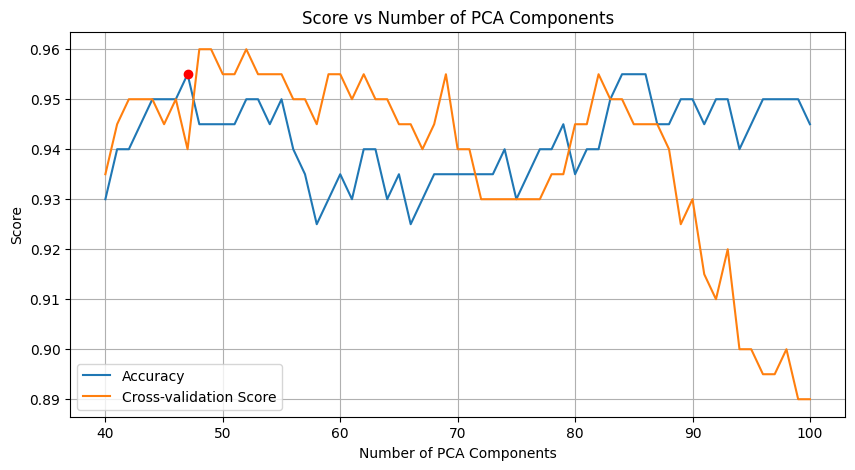

In [36]:
# Find the index of the maximum accuracy
max_indx = np.argmax(accuracy_list)

# Print the maximum accuracy and corresponding number of features
print(f'Maximum accuracy = {accuracy_list[max_indx]} with number of features = {num_components_list[max_indx]}')

# Create a new figure
plt.figure(figsize=(10, 5))

# Plot accuracy against number of features
plt.plot(num_components_list, accuracy_list, label='Accuracy')
plt.plot(num_components_list, cv_score_list, label='Cross-validation Score')

# Highlight the maximum accuracy point
plt.plot(num_components_list[max_indx], accuracy_list[max_indx], 'ro')

# Add labels and title
plt.xlabel('Number of PCA Components')
plt.ylabel('Score')
plt.title('Score vs Number of PCA Components')

# Add a legend
plt.legend()

# Add a grid
plt.grid(True)

# Show the plot
plt.show()

**Discussion of Results:**

1. **Accuracy vs. Cross-Validation Score:**
   - The plot indicates that both the accuracy and cross-validation scores generally trend upwards as the number of PCA components increases, up to a certain point.
   - Beyond approximately 50 components, the cross-validation score fluctuates, and after 60 components, the accuracy shows a significant decline.

2. **Optimal Number of Features:**
   - The maximum accuracy of 0.955 is achieved with 47 PCA components. This suggests that reducing the feature space to 47 components is sufficient to capture the most relevant information for the classification task.
   - Beyond this point, adding more components does not improve the model's performance and may even introduce noise, leading to overfitting and decreased accuracy.

3. **Model Stability:**
   - The cross-validation score remains relatively stable between 40 and 60 components, indicating that the model's performance is consistent in this range.
   - The stability suggests that the model is robust and not overly sensitive to the exact number of components within this range.

4. **Model Complexity:**
   - Using fewer components (around 47) simplifies the model, reducing computational complexity and potentially improving generalization to unseen data.

5. **Trade-off Analysis:**
   - There's a clear trade-off between the number of components and model performance. Using the optimal 47 components balances model complexity and accuracy.
   - Beyond 60 components, the performance declines, highlighting the importance of feature selection in model training.

**Conclusion:**
Based on the analysis, 47 PCA components are sufficient for this classification problem. This number maximizes accuracy while maintaining a stable and robust model performance, without unnecessary complexity.